In [1]:
import paintmind as pm
import PIL
import torchvision
import torch

2023-04-16 16:34:25.029366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 16:34:25.681323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def to_PIL(img):
    img = ((128.0*img) + 127.5)
    img = img.to(torch.uint8)
    t = torchvision.transforms.ToPILImage()
    return t(img)

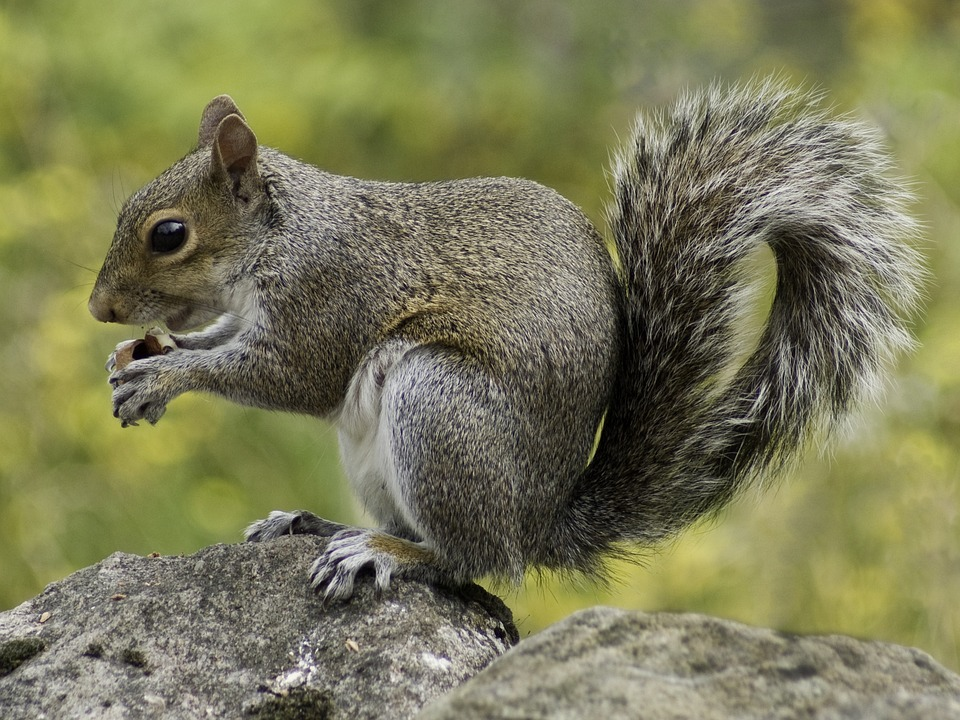

In [6]:
orig_img = PIL.Image.open('squirrel.jpg')
orig_img

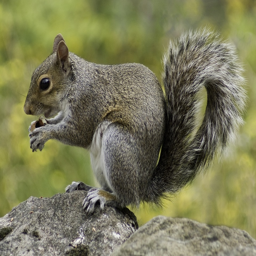

In [8]:
resize_img = orig_img.resize((256,256))
resize_img

In [9]:
model = pm.create_model(arch='vqgan', version='vit-s-vqgan', pretrained=True)

torch.Size([3, 256, 256])


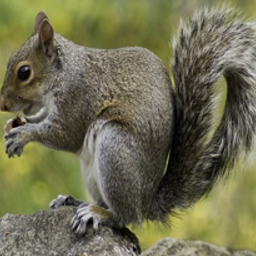

In [10]:
t1_img = pm.stage1_transform(is_train=False)(resize_img)
print(t1_img.shape)
to_PIL(t1_img)

In [15]:
z, _, _ = model.encode(t1_img.unsqueeze(0))
print(f"latent shape is {z.shape} and type {z.dtype}")

latent shape is torch.Size([1, 1024, 32]) and type torch.float32


torch.Size([3, 256, 256])


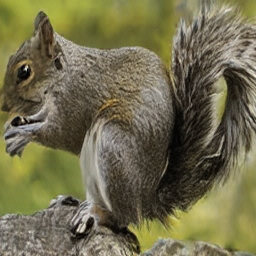

In [37]:
rec = model.decode(z).squeeze(0)
print(rec.shape)
to_PIL(rec)

256 x 256 x 3 x 8
1024 x 32 x 3

3 bit quantization. Compression ratio of 16:1.

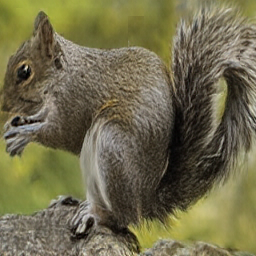

In [53]:
zq = (8*(1.5*z)).to(torch.int8)
zf = zq.to(torch.float)/(8*1.5)
rec2 = model.decode(zf).squeeze(0)
to_PIL(rec2)